# LINEAR REGRESYON 

Linear Regresyonun ne olduğunu hatırlayalım.

Lineer regresyon, iki değişken arasındaki doğrusal ilişkiyi modellemek için kullanılan bir istatistiksel analiz yöntemidir. Bu yöntem, bir bağımlı değişkenin (y) bir veya daha fazla bağımsız değişkene (x) bağlı olduğu varsayımına dayanır ve bu bağlantıyı bir doğru ile ifade eder. Bu doğru, veri noktalarının ortasından geçer ve en uygun şekilde tüm veri noktalarının dağılımını temsil etmeye çalışır.

Lineer regresyon, birçok alanda kullanılır, örneğin finansal analiz, ekonomi, işletme, biyoloji, psikoloji ve mühendislik gibi alanlarda sıklıkla kullanılır. Bu yöntem, bir bağımlı değişkenin bir veya daha fazla bağımsız değişkene nasıl bağlı olduğunu ve bu bağlantıyı ne kadar iyi açıkladığını anlamak için kullanılır.

Lineer regresyon modelleri, istatistiksel yazılımlar kullanılarak oluşturulabilir ve doğru modeli seçmek için bir dizi test ve değerlendirme yöntemi kullanılabilir. Bu yöntemler, modelin güvenilirliğini ve doğruluğunu artırmaya yardımcı olur.

Problem Tanımı:

    Araç fiyatları ve araç satış miktarı ile bu problemi temsil eden en iyi regresyon lineer "line" bulabilmektir.

In [1]:
import torch
import numpy as np
import pandas as pd
from torch.autograd import Variable
import warnings
warnings.filterwarnings("ignore")
import torch.nn as nn

Aşağıda neler yaptık:

Önce araba satış fiyatları için bir liste tanımladık ve bu listeyi önce numpy array e çevirdik. Çünkü reshape methodunu kullanarak bunu bir vektör haline getirmemiz gerekecekti. Biz reshape yapmadan önce array = (7,) şeklinde görünüyordu fakat biz bu array'i 7,1 şeklinde görünmesini istiyoruz. Bu sebeble de ardından tensor e çevirdik. Bilindiği üzere Tensor Pytorch kütüphanesinin arrayiydi.

In [2]:
#as a car company we collect this data from previous selling
#lets define car prices

car_prices_array= [3,4,5,6,7,8,9]
car_prices_np = np.array(car_prices_array, dtype= np.float32)
car_prices_np= car_prices_np.reshape(-1,1)
car_price_tensor= Variable(torch.from_numpy(car_prices_np))

In [3]:
number_of_sell_array= [7.5, 7, 6.5 , 6.0, 5.5, 5.0 ,4.5]
number_of_sell_np=  np.array(number_of_sell_array,dtype= np.float32)
number_of_sell_np= number_of_sell_np.reshape(-1,1)
number_of_sell_tensor= Variable(torch.from_numpy(number_of_sell_np))

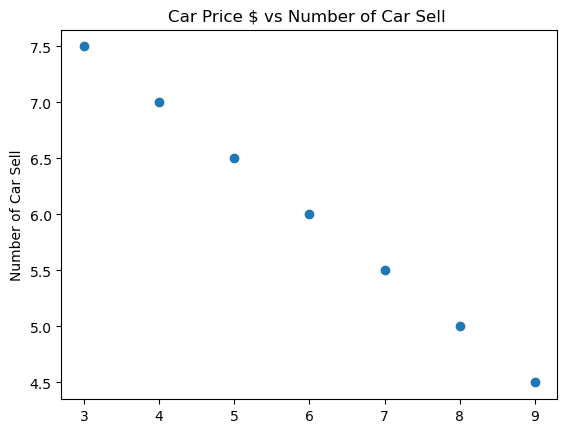

In [4]:
#Görselleştirme

import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_sell_array)
plt.xlabel= ("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price $ vs Number of Car Sell ")
plt.show()

Bu problemi lineer regresyon algoritması kullanarak çözmek için:

1. Linear Regresyon Class' ı yaratmak 

2. Linear Regresyon Class kullanarak bir model tanımlayacağız.

3. Linear Regresyon parametrelerimizi eğitebilmek için bir tane ERROR değeri tanımlayacağız. (MSE : Mean Squared Error)

4. Mean Square Error kullanarak hesapladığımız hataları (loss) üzerinde Optimizasyon işlemi uygulayacağız. Bunun için SGD: Stochastic Gradient Descent kullanacağız. 

5. BackPropagation işlemi uygulayıp Traning işlemimizin ilk step'i tamamlamış olacağız.

6. Prediction.

Pytorch Kullanarak Adımları implement etmek:

İlk adım olarak bir linear regreyon classı yaratmaktı. Linear Regresyon formülünü bir hatırlayalım. 

1.y= w.x+ b ==> Burada y ve x değerlerimizin bir boyutlu olduğunun unutmayalım. (dimension(y,x)=1). Bu parametreleri incelersek "weight"= elde etmek istediğimiz line'ın eğimidir. "Bias" ise y ekseniyle kesiştiği noktadır.


2.Ardından model tanımlama işlemine geçelim. model=LG() adlı bir obje yarattık. 

3.Mse tanımlamak.

4.SGD tanımlamak. SGD'nin belli başlı parametreleri vardır. Bunlardan bir tanesi "Learning Rate", ardından "model parametreleri" içine değer olarak alacaktır. SGD(modelParams(w,b), learningRate)

5.BackPropagation: w ve b yi güncelleceğimiz adım.





1000 iterasyonlu bir tahmin işlemi için birinci adımı gözümüzde canlandıralım:

ilk olarak w ve b değerlerini initialize etmemiz gerekecek. Bunlara birer değer vermemiz gerekecek. Şimdilik w=0 ve b=6 diye güşünüp tam düz bir çizgi elde edelim.

Modelimizin içine car_price değerini yolladık . model(car_price)==> result (y)
Elde ettiğimiz y değerini alıp gerçek değerlerle hatalar arasında MSE değerini loss değerini bulmamız gerekiyor. Loss= MSE(y_result, y_real) 

Ardından bulduğumuz loss' a göre weight değerinin türevini bulacağız ve Backpropagation adımını gerçekleştirmiş olacağız. 
loss.backward()===> gradientleri elde etmiş olduk. 

weight güncelleme işlemi : weight- learning_rate.gradient==> weigth2 ===> Bu adımın gerçekleştirilmesi için de bir Optimizer değerim vardı vardı ve içinde ilgili algoritmaların parametrelerini tutuyor. Optimizer.step() methodu ile w ve b değerlerini güncellemiş oluyoruz. 

In [5]:
#kütüphanler
import torch
import numpy as np
import pandas as pd
from torch.autograd import Variable
import warnings
warnings.filterwarnings("ignore")
import torch.nn as nn #NeuralNetwork (torch içindeki)
import matplotlib.pyplot as plt
    

 PyTorch kütüphanesi kullanılarak bir doğrusal regresyon modeli sınıfını tanımlamak için yazılmıştır. nn.Module' den inheritance edecektir. Torch kütüphanesi içindeki nn modullerini kullanmak istediğimizi belirtiyoruz. Ardından constructor tanımlıyoruz yani: girdi boyutu ve çıktı boyutunu kendimiz vereceğiz ki bunun bir olduğunu söylemiştik. Linear Regresyon classının girdileri input ve output size'dir. nn.modulunden belli başlı fonksiyonuları kullanabilmek için inheritance etmem gerekiyor. "super(LinearRegression,self).__init__() " inhertance işlemidir. Ardından forward metonu tanımladık.

epoch 0, loss 26.93046760559082
epoch 50, loss 5.0036797523498535
epoch 100, loss 3.3811967372894287
epoch 150, loss 2.284816026687622
epoch 200, loss 1.5439459085464478
epoch 250, loss 1.0433086156845093
epoch 300, loss 0.7050084471702576
epoch 350, loss 0.4764038920402527
epoch 400, loss 0.32192566990852356
epoch 450, loss 0.21753840148448944
epoch 500, loss 0.1470000296831131
epoch 550, loss 0.09933435171842575
epoch 600, loss 0.06712432950735092
epoch 650, loss 0.04535893723368645
epoch 700, loss 0.03065088950097561
epoch 750, loss 0.020711949095129967
epoch 800, loss 0.013995873741805553
epoch 850, loss 0.009457608684897423
epoch 900, loss 0.006390984635800123
epoch 950, loss 0.00431858329102397
epoch 1000, loss 0.0029182531870901585


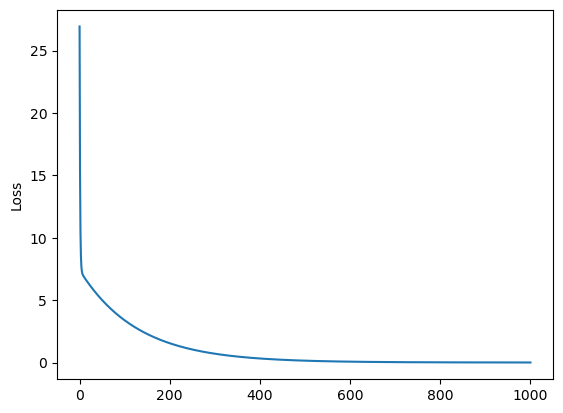

In [12]:
#step 1 
#Linear Regresyon sınıfı yaratmak:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()  
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
    
#Step 2 Model tanımlama

input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

#step 3 MSE

mse = nn.MSELoss()

#step4 Optimization(Find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)


#Train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number), loss_list)

plt.ylabel("Loss")
plt.show()

# Model Testi

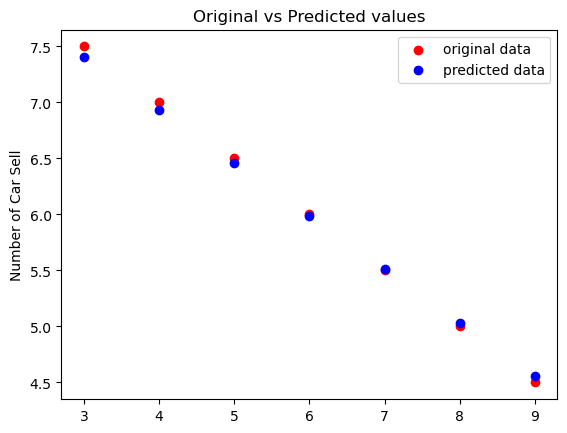

In [13]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()

plt.ylabel("Number of Car Sell")

plt.title("Original vs Predicted values")
plt.show()

İterasyon sayısını artırdığımızda loss değeri giderek azalacaktır. Loss değeri azaldığında mavi ve kırmızı noktalar üst üste olacaklardır.